In [1]:
import os
os.__file__
# os.environ['R_USER']='C:/ProgramData/Anaconda3/envs/cda_python/Lib/site-packages/rpy2'

'C:\\ProgramData\\Anaconda3\\envs\\cda_python\\lib\\os.py'

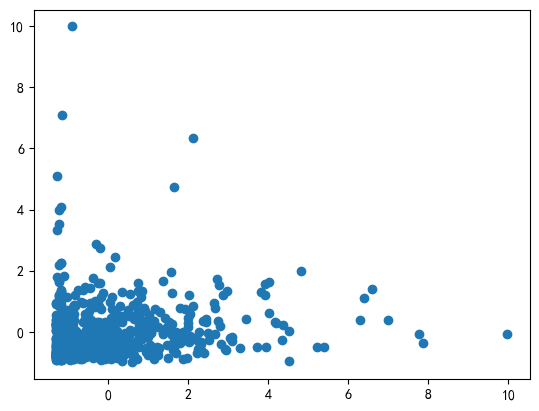

In [61]:
tel_data = pd.read_csv('profile_telecom.csv')
tel_data.head()
data_tel=tel_data.loc[:,'cnt_call':]
data_tel.head()

# 3.做主成分之前，进行中心标准化
from sklearn import preprocessing
data_tel = preprocessing.scale(data_tel)

# 4.使用sklearn的主成分分析，用于判断保留主成分的数量
from sklearn.decomposition import PCA
# 建立模型
# n_components:保留主成分的个数，初始设置一般为变量的个数
pca = PCA(n_components=4)
pca.fit(data_tel)
# 单个主成分解释的方差(特征值)
pca.explained_variance_
# 单个主成分解释的方差比率
pca.explained_variance_ratio_
pca = PCA(n_components=2)
pca.fit(data_tel)
# 单个主成分解释的方差(特征值)
pca.explained_variance_
# 单个主成分解释的方差比率
pca.explained_variance_ratio_
#主成分得分
score_tel = pd.DataFrame(pca.fit_transform(data_tel))


#将主成分得分合并到原始数据
tel_pca=pd.concat([tel_data, score_tel], axis=1)
tel_pca
tel_pca= tel_pca.rename(columns={0: "score_tel_0",1:"score_tel_1"})
tel_pca.corr()
#按主因成分等分 排序
tel_pca.sort_values(by=['score_tel_0','score_tel_1'],ascending=False)


# 1.因子分析的概念很多，作为刚入门的人，我们可以认为因子分析是主成分分析的延续
from fa_kit import FactorAnalysis
from fa_kit import plotting as fa_plotting

fa = FactorAnalysis.load_data_samples(
    data_tel,     #标准化数据
    preproc_demean=True,
    preproc_scale=True
)
fa.extract_components()
# 2.设定提取主成分的方式，建议使用“top_n”法
fa.find_comps_to_retain(method='top_n', num_keep = 2)
# 3.通过最大方差法进行因子旋转
fa.rotate_components()
#查看因子权重（旋转后）
# fa.comps['rot']
pd.DataFrame(fa.comps['rot'])
#因子得分
fa_scores = fa.get_component_scores(data_tel)
fa_scores
#因子命名
fa_scores = pd.DataFrame(fa_scores)

tel_fa=pd.concat([tel_data, fa_scores], axis=1)
tel_fa.corr()
tel_fa=tel_fa.rename(columns={0: "web_fa", 1: "call_fa"})

from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['SimHei'] # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题
import matplotlib.pyplot as plt
x=tel_fa['web_fa']
y=tel_fa['call_fa']
#label=tel_fa['ID']
plt.scatter(x, y)
#for a,b,l in zip(x,y,label):
#    plt.text(a, b+0.1, '%s.' % l, ha='center', va= 'bottom',fontsize=14)

plt.show();

In [55]:
pca_fa= pca_fa.rename(columns={0: "ATM-POS", 1:"TBM", 2:"CSC"})
pca_fa

,ID,CNT_TBM,CNT_ATM,CNT_POS,CNT_CSC,CNT_TOT,ATM-POS,TBM,CSC
0,41360,34,3,3,9,49,-0.852354,-0.294938,0.143935
1,52094,44,17,5,18,84,-0.333078,-0.244334,0.939343
2,57340,122,26,32,36,216,0.918067,0.593787,2.349496
3,76885,42,3,6,1,52,-0.741847,-0.210507,-0.521592
4,89150,20,15,2,2,39,-0.499703,-0.492714,-0.367629
...,...,...,...,...,...,...,...,...,...
99995,875638608,24,6,2,1,33,-0.788934,-0.415017,-0.492244
99996,875656523,79,9,2,7,97,-0.692379,0.115718,0.016816
99997,875663288,44,111,57,9,221,4.555096,-0.466002,0.442345
99998,875670226,10,5,2,1,18,-0.821689,-0.548095,-0.498124


In [54]:
pca_fa=pd.concat([bank_data, score], axis=1)
pca_fa.corr()

,ID,CNT_TBM,CNT_ATM,CNT_POS,CNT_CSC,CNT_TOT,0,1,2
ID,1.000000,-0.004363,0.005550,0.000247,0.000281,-0.002797,0.003364,-0.004811,0.000777
CNT_TBM,-0.004363,1.000000,0.055648,0.083624,0.198835,0.939048,0.088616,0.995325,0.202802
CNT_ATM,0.005550,0.055648,1.000000,0.341161,0.242106,0.321910,0.798520,-0.007237,0.310694
CNT_POS,0.000247,0.083624,0.341161,1.000000,0.234055,0.345300,0.838260,0.130613,0.181573
CNT_CSC,0.000281,0.198835,0.242106,0.234055,1.000000,0.371736,0.287359,0.201220,0.994313
CNT_TOT,-0.002797,0.939048,0.321910,0.345300,0.371736,1.000000,0.410014,0.932157,0.377686
0,0.003364,0.088616,0.798520,0.838260,0.287359,0.410014,1.000000,0.082185,0.293591
1,-0.004811,0.995325,-0.007237,0.130613,0.201220,0.932157,0.082185,1.000000,0.194879
2,0.000777,0.202802,0.310694,0.181573,0.994313,0.377686,0.293591,0.194879,1.000000


In [52]:
import numpy as np
score = pd.DataFrame(fa.get_component_scores(data_bank))
score

,0,1,2
0,-0.852354,-0.294938,0.143935
1,-0.333078,-0.244334,0.939343
2,0.918067,0.593787,2.349496
3,-0.741847,-0.210507,-0.521592
4,-0.499703,-0.492714,-0.367629
...,...,...,...
99995,-0.788934,-0.415017,-0.492244
99996,-0.692379,0.115718,0.016816
99997,4.555096,-0.466002,0.442345
99998,-0.821689,-0.548095,-0.498124


In [51]:
#最大方差旋转
fa.rotate_components()
fa.comps['rot']

array([[ 0.00403942,  0.99290049,  0.00781146],
       [ 0.67147566, -0.09056898,  0.10008053],
       [ 0.74100191,  0.07670639, -0.0847072 ],
       [-0.00450402,  0.00787399,  0.99133625]])

In [50]:
fa = FactorAnalysis.load_data_samples(
    data_bank,     #标准化数据
    preproc_demean=True,
    preproc_scale=True
)
fa.extract_components()
#主成方法
fa.find_comps_to_retain(method='top_n', num_keep=3)

array([0, 1, 2], dtype=int64)

In [ ]:
#因子分析
from fa_kit import FactorAnalysis
from fa_kit import plotting as fa_plotting

In [49]:
pca = PCA(n_components=3)
pca.fit(data_bank)

PCA(n_components=3)

In [48]:
#初始模型建立
pca = PCA(n_components=4)
pca.fit(data_bank)
#解释的方差
pca.explained_variance_
#解释的方差的比例
pca.explained_variance_ratio_

PCA(n_components=4)

array([1.60786876, 1.00252275, 0.7339482 , 0.65570029])

array([0.40196317, 0.25062818, 0.18348521, 0.16392343])

In [46]:
data_bank = preprocessing.scale(data_bank)
data_bank

array([[-0.3374763 , -0.79112548, -0.43037594,  0.19094614],
       [-0.23861679, -0.1198557 , -0.33391478,  0.93300005],
       [ 0.53248735,  0.31167487,  0.9683109 ,  2.41710788],
       ...,
       [-0.23861679,  4.38724139,  2.17407542,  0.19094614],
       [-0.57473911, -0.69522979, -0.47860652, -0.46865734],
       [ 0.59180305, -0.07190786,  0.38954393, -0.46865734]])

In [44]:
# 1.导入数据
bank_data = pd.read_csv("profile_bank.csv")
data_bank = bank_data.loc[ :,'CNT_TBM':'CNT_CSC']
data_bank.head()

,CNT_TBM,CNT_ATM,CNT_POS,CNT_CSC
0,34,3,3,9
1,44,17,5,18
2,122,26,32,36
3,42,3,6,1
4,20,15,2,2


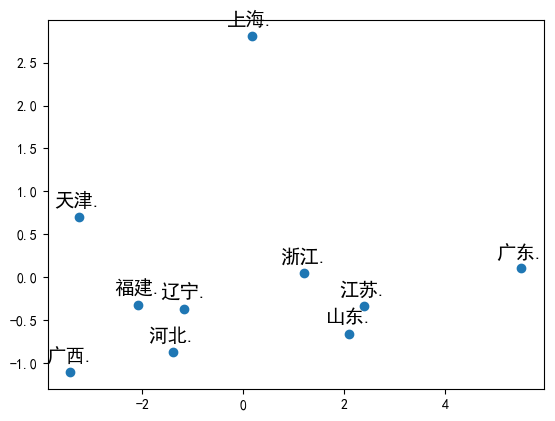

In [42]:
city_data = pd.read_csv('cities_10.csv',encoding='gbk')
city_data.head()
data_city=city_data.loc[:,'X1':]
data_city.head()

data_city.corr()
# 3.做主成分之前，进行中心标准化
from sklearn import preprocessing
data_city = preprocessing.scale(data_city)
# 4.使用sklearn的主成分分析，用于判断保留主成分的数量
from sklearn.decomposition import PCA
# 建立模型
# n_components:保留主成分的个数，初始设置一般为变量的个数
pca = PCA(n_components=9)
pca.fit(data_city)
# 单个主成分解释的方差(特征值)
pca.explained_variance_
# 单个主成分解释的方差比率
pca.explained_variance_ratio_
pca = PCA(n_components=2)
pca.fit(data_city)
# 单个主成分解释的方差(特征值)
pca.explained_variance_
# 单个主成分解释的方差比率
pca.explained_variance_ratio_
#主成分得分
score_city = pd.DataFrame(pca.fit_transform(data_city))
type(score_city)

#将主成分得分合并到原始数据
city_pca=pd.concat([city_data, score_city], axis=1)
city_pca
city_pca= city_pca.rename(columns={0: "score_city_0",1:"score_city_1"})
city_pca
#按主因成分等分 排序
city_pca.sort_values(by=['score_city_0','score_city_1'],ascending=False)
data_city

# 1.因子分析的概念很多，作为刚入门的人，我们可以认为因子分析是主成分分析的延续
from fa_kit import FactorAnalysis
from fa_kit import plotting as fa_plotting

fa = FactorAnalysis.load_data_samples(
    data_city,     #标准化数据
    preproc_demean=True,
    preproc_scale=True
)
fa.extract_components()
# 2.设定提取主成分的方式，建议使用“top_n”法
fa.find_comps_to_retain(method='top_n', num_keep = 2)
# 3.通过最大方差法进行因子旋转
fa.rotate_components()
#查看因子权重（旋转后）
fa.comps['rot']
pd.DataFrame(fa.comps['rot'])
#因子得分
fa_scores = fa.get_component_scores(data_city)
fa_scores
#因子命名
fa_scores = pd.DataFrame(fa_scores)
a=fa_scores.rename(columns={0: "Gross", 1: "Avg"})
citi10_fa=pd.concat([city_data, a], axis=1)
citi10_fa.sort_values('Avg',ascending=False)

from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['SimHei'] # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题
import matplotlib.pyplot as plt
x=citi10_fa['Gross']
y=citi10_fa['Avg']
label=citi10_fa['AREA']
plt.scatter(x, y)
for a,b,l in zip(x,y,label):
    plt.text(a, b+0.1, '%s.' % l, ha='center', va= 'bottom',fontsize=14)

plt.show();

In [38]:
#按主因成分等分 排序
Loan_pca.sort_values(by='score',ascending=False)

,ID,X1,X2,X3,X4,X5,score
6,7,94.0,94.0,87.5,89.5,92.0,3.960102
2,3,90.7,87.3,91.0,81.5,80.0,2.603684
5,6,85.0,79.2,80.3,84.4,76.5,1.389937
0,1,76.5,81.5,76.0,75.8,71.7,0.267437
3,4,77.5,73.6,70.9,69.8,74.8,-0.440204
4,5,85.6,68.5,70.0,62.2,76.5,-0.678219
1,2,70.6,73.0,67.6,68.1,78.5,-0.775172
7,8,84.6,66.9,68.8,64.8,66.4,-1.310850
9,10,70.0,69.2,71.7,64.9,68.9,-1.486076
8,9,57.7,60.4,57.4,60.8,65.0,-3.530640


In [37]:
#将主成分得分合并到原始数据
Loan_pca=pd.concat([model_data, score], axis=1)
Loan_pca= Loan_pca.rename(columns={0: "score"})
Loan_pca

,ID,X1,X2,X3,X4,X5,score
0,1,76.5,81.5,76.0,75.8,71.7,0.267437
1,2,70.6,73.0,67.6,68.1,78.5,-0.775172
2,3,90.7,87.3,91.0,81.5,80.0,2.603684
3,4,77.5,73.6,70.9,69.8,74.8,-0.440204
4,5,85.6,68.5,70.0,62.2,76.5,-0.678219
5,6,85.0,79.2,80.3,84.4,76.5,1.389937
6,7,94.0,94.0,87.5,89.5,92.0,3.960102
7,8,84.6,66.9,68.8,64.8,66.4,-1.310850
8,9,57.7,60.4,57.4,60.8,65.0,-3.530640
9,10,70.0,69.2,71.7,64.9,68.9,-1.486076


In [36]:
#主成分得分
score = pd.DataFrame(pca.fit_transform(data))
score

,0
0,0.267437
1,-0.775172
2,2.603684
3,-0.440204
4,-0.678219
5,1.389937
6,3.960102
7,-1.310850
8,-3.530640
9,-1.486076


In [35]:
pca.components_

array([[0.41348998, 0.47289329, 0.46559941, 0.45465337, 0.42650378]])

In [34]:
# 通过主成分在每个变量上的权重的大小，确定每个主成分的代表性(特征向量)
pd.DataFrame(pca.components_).T

,0
0,0.413490
1,0.472893
2,0.465599
3,0.454653
4,0.426504


In [33]:
#模型调整(重新拟合模型)
pca = PCA(n_components=1)
pca.fit(data)
pca.explained_variance_
pca.explained_variance_ratio_

PCA(n_components=1)

array([4.67909448])

array([0.84223701])

In [32]:
# 单个主成分解释的方差比率
pca.explained_variance_ratio_

array([0.84223701, 0.07667191, 0.0594929 , 0.01591189, 0.00568629])

In [31]:
# 单个主成分解释的方差(特征值) ; 排序后的结果；要求大于1才能选择，第一个主成分携带了原始4.67个数据信息
pca.explained_variance_

array([4.67909448, 0.42595504, 0.33051612, 0.0883994 , 0.03159051])

In [30]:
# 4.使用sklearn的主成分分析，用于判断保留主成分的数量
from sklearn.decomposition import PCA
# 建立模型
# n_components:保留主成分的个数，初始设置一般为变量的个数
pca = PCA(n_components=5)
pca.fit(data)

PCA(n_components=5)

In [24]:
# 3.做主成分之前，进行中心标准化
from sklearn import preprocessing
import numpy as np
data = preprocessing.scale(data)
data

array([[-0.26099897,  0.63617414,  0.19936295,  0.37986418, -0.44786189],
       [-0.82713645, -0.24452296, -0.69140767, -0.42813421,  0.46669092],
       [ 1.10156919,  1.23712039,  1.79002477,  0.97799286,  0.66843051],
       [-0.16504347, -0.1823561 , -0.34146207, -0.24974496, -0.0309334 ],
       [ 0.61219612, -0.71077436, -0.43690178, -1.04724986,  0.1977048 ],
       [ 0.55462281,  0.39786786,  0.65535267,  1.28230394,  0.1977048 ],
       [ 1.41822235,  1.93131692,  1.41887034,  1.81747171,  2.28234725],
       [ 0.51624061, -0.87655264, -0.56415473, -0.77441924, -1.16067512],
       [-2.06496245, -1.55002689, -1.77305771, -1.19415866, -1.3489654 ],
       [-0.88470975, -0.63824637, -0.25662677, -0.76392575, -0.82444246]])

In [21]:
# 2.查看相关系数矩阵，判定做变量降维的必要性
corr_matrix = data.corr()
corr_matrix

,X1,X2,X3,X4,X5
X1,1.000000,0.726655,0.825342,0.676314,0.685563
X2,0.726655,1.000000,0.929080,0.938382,0.841413
X3,0.825342,0.929080,1.000000,0.883457,0.733482
X4,0.676314,0.938382,0.883457,1.000000,0.762563
X5,0.685563,0.841413,0.733482,0.762563,1.000000


In [19]:
import pandas as pd
#导入数据
model_data = pd.read_csv('loan_aply.csv',encoding='gbk')
data = model_data.loc[:,'X1':]
data.head()

,X1,X2,X3,X4,X5
0,76.5,81.5,76.0,75.8,71.7
1,70.6,73.0,67.6,68.1,78.5
2,90.7,87.3,91.0,81.5,80.0
3,77.5,73.6,70.9,69.8,74.8
4,85.6,68.5,70.0,62.2,76.5


In [9]:
#全部行输出
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import os
os.chdir(r'C:\Data\Jupyter_file\统计建模\连续变量降维')

In [1]:
import sys
sys.executable

'C:\\ProgramData\\Anaconda3\\envs\\cda_python\\python.exe'

Optimization terminated successfully.
         Current function value: 0.421544
         Iterations 6
              precision    recall  f1-score   support

           0       0.84      0.99      0.91      2508
           1       0.56      0.05      0.09       492

    accuracy                           0.84      3000
   macro avg       0.70      0.52      0.50      3000
weighted avg       0.80      0.84      0.78      3000

Optimization terminated successfully.
         Current function value: 0.628656
         Iterations 6
              precision    recall  f1-score   support

           0       0.91      0.64      0.75      2508
           1       0.27      0.67      0.38       492

    accuracy                           0.64      3000
   macro avg       0.59      0.66      0.57      3000
weighted avg       0.80      0.64      0.69      3000

Optimization terminated successfully.
         Current function value: 0.621254
         Iterations 6
              precision    recall  f1-sc

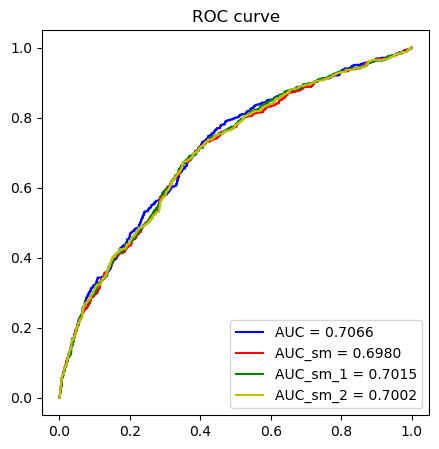

In [1]:
import os
os.__file__
import sys
# sys.executable
# dir()

# 分割测试集训练集
from sklearn.model_selection import train_test_split
# 模型评估（召回率），选择0.5为阈值
from sklearn.metrics import classification_report
import numpy as np
from scipy import stats
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
os.chdir(r'C:\Users\fzh00\Desktop\文件\python资料\Python数据清洗基础\data\2_逻辑回归案例')
data = pd.read_excel('客户列表.xls')
# data.head()
#‘成交意向度’为系统输出，这里不需要
data.drop('成交意向度', axis=1, inplace=True)
data.rename(columns={'客户ID':'ID', '对话时长(总时长/对话数量)':'对话时长', '互动次数(总次数/对话数量)':'互动次数',
                     '是否已成交(1已成交0未成交)':'是否成交'}, inplace=True)
# 去掉变量ID
data.drop('ID', axis=1, inplace=True)
train,test = train_test_split(data,test_size=0.3,random_state=6)


#拟合模型
formula = '是否成交~对话数量+对话时长+互动次数+销售说话时长占比+销售最长讲述+客户最长讲述+对话得分'
model = smf.logit(formula,train) #实例化
model = model.fit() #拟合数据
model.summary() #输出结果
#输出预测概率
pre = model.predict(test.iloc[:,:-1])
#预测标签
label = (pre>0.5).astype('int')
#输出 分类报告,Y的真实值 和预测标签
print(classification_report(test.iloc[:,-1],label))

#下面是模型调优
#SMOTE,处理不平衡数据的方法
# train['是否成交'].value_counts()
# SMOTE过采样:对训练集进行过采
from imblearn.over_sampling import SMOTE

#过采样（SMOTE）
smote = SMOTE(random_state=42)   #实例化
Xtrain_sm,  Ytrain_sm= smote.fit_resample(train.iloc[:,:-1], train.iloc[:,-1])   #过采样
#合并过采样后的自变量与因变量
train_sm = pd.concat([Xtrain_sm, Ytrain_sm], axis=1)
#重新拟合模型
formula2='是否成交~对话数量+对话时长+互动次数+销售说话时长占比+销售最长讲述+客户最长讲述+对话得分'
model_sm = smf.logit(formula=formula2, data=train_sm)   #实例化
model_sm = model_sm.fit()   #拟合数据
model_sm.summary()
#预测
pre_sm = model_sm.predict(test.iloc[:,:-1])
# (pre_sm>0.5).sum()
#输出 分类报告,Y的真实值 和预测标签
print(classification_report(test.iloc[:,-1],(pre_sm>0.5).astype('int')))
#混淆矩阵，默认阈值0.5
# model_sm.pred_table()
#改进方法BorderlineSMOTE1
from imblearn.over_sampling import BorderlineSMOTE
smote_b1 = BorderlineSMOTE(random_state=123)
Xtrain_sm_1,Ytrain_sm_1 = smote_b1.fit_resample(train.iloc[:,:-1],train.iloc[:,-1])
train_sm_1 = pd.concat([Xtrain_sm_1, Ytrain_sm_1],axis=1)
# train_sm_1.shape
formula3='是否成交~对话数量+对话时长+互动次数+销售说话时长占比+销售最长讲述+客户最长讲述+对话得分'
model_sm_1 = smf.logit(formula=formula3, data=train_sm_1).fit()
model_sm_1.summary()
pre_label_sm_1= (model_sm_1.predict(test) > 0.5).astype("int")   # 生成预测值
print(classification_report(test.iloc[:,-1], pre_label_sm_1))   # Y的真实值，Y的预测值

#改进方法BorderlineSMOTE2
smote_b2 = BorderlineSMOTE(random_state=123, kind='borderline-2') #默认SMOTE1
Xtrain_sm_2,Ytrain_sm_2 = smote_b2.fit_resample(train.iloc[:,:-1],train.iloc[:,-1])
train_sm_2 = pd.concat([Xtrain_sm_2, Ytrain_sm_2],axis=1)
formula4='是否成交~对话数量+对话时长+互动次数+销售说话时长占比+销售最长讲述+客户最长讲述+对话得分'
model_sm_2 = smf.logit(formula=formula4, data=train_sm_2).fit()
# model_sm_2.summary()

pre_label_sm_2= (model_sm_2.predict(test) > 0.5).astype("int")   # 生成预测值
print(classification_report(test.iloc[:,-1], pre_label_sm_2))   # Y的真实值，Y的预测值

#预测出来的标签的结果，用于得到分类报告的
pre_sm_1 = model_sm_1.predict(test)
pre_sm_2 = model_sm_2.predict(test)

#模型评估
from sklearn import metrics
#将真实的标签值与预测出来的为1的概率值传入metrics.roc_curve（），返回的是一系列的tpr、fpr、阈值的取值情况
fpr, tpr, th = metrics.roc_curve(test.iloc[:,-1], pre)
fpr_sm, tpr_sm, th_sm = metrics.roc_curve(test.iloc[:,-1], pre_sm)
fpr_sm_1, tpr_sm_1, th_sm_1 = metrics.roc_curve(test.iloc[:,-1], pre_sm_1)
fpr_sm_2, tpr_sm_2, th_sm_2 = metrics.roc_curve(test.iloc[:,-1], pre_sm_2)

#绘图
plt.figure(figsize=[5, 5])
plt.plot(fpr, tpr, 'b', label='AUC = %.4f' %metrics.auc(fpr, tpr))
plt.plot(fpr_sm, tpr_sm, 'r', label='AUC_sm = %.4f' %metrics.auc(fpr_sm, tpr_sm))
plt.plot(fpr_sm_1, tpr_sm_1, 'g', label='AUC_sm_1 = %.4f' %metrics.auc(fpr_sm_1, tpr_sm_1))
plt.plot(fpr_sm_2, tpr_sm_2, 'y', label='AUC_sm_2 = %.4f' %metrics.auc(fpr_sm_2, tpr_sm_2))


plt.legend(loc = 'lower right')
plt.title('ROC curve')
plt.show();

In [ ]:
#全部行输出
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"